# Biostat M280 Homework 1

#### Due Apr 27 @ 11:59PM

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

0. Apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

0. Create a **private** repository `biostat-m280-2018-spring` and add `Hua-Zhou` and `LuZhangstat` (TA) as your collaborators.

0. Top directories of the repository should be `hw1`, `hw2`, ... Create two branches `master` and `develop`. The `develop` branch will be your main playground, the place where you develop solution (code) to homework problems and write up report. The `master` branch will be your presentation area. Put your homework submission files (IJulia notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in `master` branch.  

0. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

0. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming by John Myles White. Following rules in the style guide will be strictly enforced when grading: (4), (6), (7), (8), (9), (12), (13) and (16).

***  Have done the github setup. Username: huiyuhu ***

## Q2

Let's check whether floating-point numbers obey certain algebraic rules.  
0. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

0. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

0. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

0. Is `0 * x == 0` true for all floating-point number `x`?  

0. Is `x / a == x * (1 / a)` always true?

In [88]:
# 1
x = 0.1;
y = 0.1;
z = 1.0;

(x + y) + z == x + (y + z)

false

In [89]:
(x + y) + z

1.2

In [90]:
x + (y + z)

1.2000000000000002

* The result showed that the associative rule for addition is not ture. The reason is that x + (y + z) = 1.2000000000000002. Floating point numbers have a fixed length which means that round off errors are common. The bits showed as follow:

In [91]:
@show bits(x)  
@show bits(y)
@show bits(z)
@show bits(x + y)
@show bits(y + z)
@show bits(x + (y + z))
@show bits((x + y) + z) #bits are different, so the result showed the false.

bits(x) = "0011111110111001100110011001100110011001100110011001100110011010"
bits(y) = "0011111110111001100110011001100110011001100110011001100110011010"
bits(z) = "0011111111110000000000000000000000000000000000000000000000000000"
bits(x + y) = "0011111111001001100110011001100110011001100110011001100110011010"
bits(y + z) = "0011111111110001100110011001100110011001100110011001100110011010"
bits(x + (y + z)) = "0011111111110011001100110011001100110011001100110011001100110100"
bits((x + y) + z) = "0011111111110011001100110011001100110011001100110011001100110011"


"0011111111110011001100110011001100110011001100110011001100110011"

In [120]:
# 2
x = 0.1;
y = 0.02;
z = 0.003;
(x * y) * z == x * (y * z)

false

* Let x = 0.1, y =0.02, z = 0.003, the associative rule for multiplication is false. The bitscode showed as follow: 

In [123]:
@show bits(x)  
@show bits(y)
@show bits(z)
@show bits(x * y)
@show bits(y * z)
@show bits(x * (y * z))
@show bits((x * y) * z) #bits are different

bits(x) = "0011111110111001100110011001100110011001100110011001100110011001"
bits(y) = "0011111110010100011110101110000101000111101011100001010001111010"
bits(z) = "0011111101101000100100110111010010111100011010100111111011111001"
bits(x * y) = "0011111101100000011000100100110111010010111100011010100111111010"
bits(y * z) = "0011111100001111011101010001000001001101010101010001110101100110"
bits(x * (y * z)) = "0011111011011001001010100111001101110001000100001110010001010001"
bits((x * y) * z) = "0011111011011001001010100111001101110001000100001110010001010000"


"0011111011011001001010100111001101110001000100001110010001010000"

In [121]:
# 3
a = 0.2;
a * (x + y) == a * x + a * y

false

* Let a = 0.02, distributive rule is not true.

In [124]:
@show bits(a * (x + y))
@show bits(a * x + a * y) # bits are different

bits(a * (x + y)) = "0011111110011000100100110111010010111100011010100111111011111000"
bits(a * x + a * y) = "0011111110011000100100110111010010111100011010100111111011110111"


"0011111110011000100100110111010010111100011010100111111011110111"

In [122]:
# 4
0 * x == 0

true

In [97]:
0 * Inf == 0
@show 0 * Inf

0Inf = NaN


NaN

* If x is a infinite number, 0 * x is not true.

In [98]:
# 5 
x = 3.0; a = 10.0;
x / a == x * (1 / a) # bits are different

false

* Let x = 3.0, a = 10.0, x / a = x * (1 / a) is not true.

In [99]:
@show bits(x / a)
@show bits(x * (1 / a)) # bits are different

bits(x / a) = "0011111111010011001100110011001100110011001100110011001100110011"
bits(x * (1 / a)) = "0011111111010011001100110011001100110011001100110011001100110100"


"0011111111010011001100110011001100110011001100110011001100110100"

## Q3

Consider Julia function
```julia
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end
```
0. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
2. Compare the bitcode from questions 1 and 2. What do you find?  
3. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end
```
Explain what does macro `@fastmath` do?

In [100]:
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end

g (generic function with 1 method)

Use 1 as an Int64 input and 1.0 as a Float64 input.

In [101]:
@show typeof(1)
@code_llvm g(1)

typeof(1) = Int64

define i64 @julia_g_65587(i64) #0 !dbg !5 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}


In [102]:
@show typeof(1.0)
@code_llvm g(1.0)

typeof(1.0) = Float64

define double @julia_g_65588(double) #0 !dbg !5 {
top:
  %1 = fmul double %0, 5.000000e+00
  %2 = fadd double %1, -1.000000e+00
  %3 = fmul double %2, 5.000000e+00
  %4 = fadd double %3, -1.000000e+00
  %5 = fmul double %4, 5.000000e+00
  %6 = fadd double %5, -1.000000e+00
  %7 = fmul double %6, 5.000000e+00
  %8 = fadd double %7, -1.000000e+00
  %9 = fmul double %8, 5.000000e+00
  %10 = fadd double %9, -1.000000e+00
  %11 = fmul double %10, 5.000000e+00
  %12 = fadd double %11, -1.000000e+00
  %13 = fmul double %12, 5.000000e+00
  %14 = fadd double %13, -1.000000e+00
  %15 = fmul double %14, 5.000000e+00
  %16 = fadd double %15, -1.000000e+00
  %17 = fmul double %16, 5.000000e+00
  %18 = fadd double %17, -1.000000e+00
  %19 = fmul double %18, 5.000000e+00
  %20 = fadd double %19, -1.000000e+00
  ret double %20
}


In [103]:
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end

g_fastmath (generic function with 1 method)

In [104]:
@code_llvm g_fastmath(1)


define i64 @julia_g_fastmath_65608(i64) #0 !dbg !5 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}


In [105]:
@code_llvm g_fastmath(1.0)


define double @julia_g_fastmath_65609(double) #0 !dbg !5 {
top:
  %1 = fmul fast double %0, 9.765625e+06
  %2 = fadd fast double %1, -2.441406e+06
  ret double %2
}


* @fastmath is to allow floating point optimizations that are correct for real numbers When using the g_fastmath(1.0), the result showed that it may fit associate law. 

## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.  
0. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x -1` at points `x`.  

1. Plot the polynomial `y = (x - 1)^7` at points `x`.  

2. Explain what you found.

In [106]:
#Install package
#Pkg.add("Plots")
#Pkg.add("PyPlot")

In [107]:
# Creat the vector x
x = 0.988:0.002:1.012; 

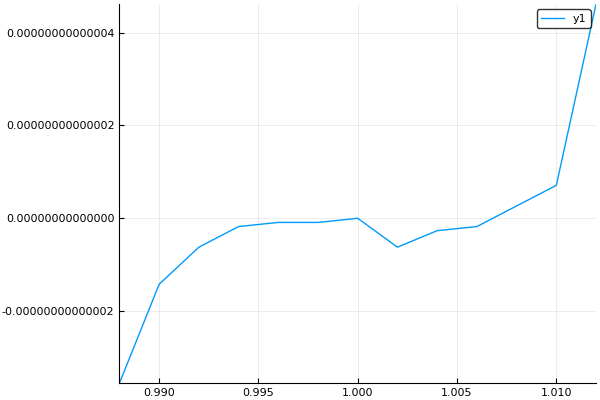

In [108]:
# Plot the polynomial #1
y = x.^7 - 7x.^6 + 21x.^5 - 35x.^4 + 35x.^3 - 21x.^2 + 7x - 1;
using Plots
plot(x, y)

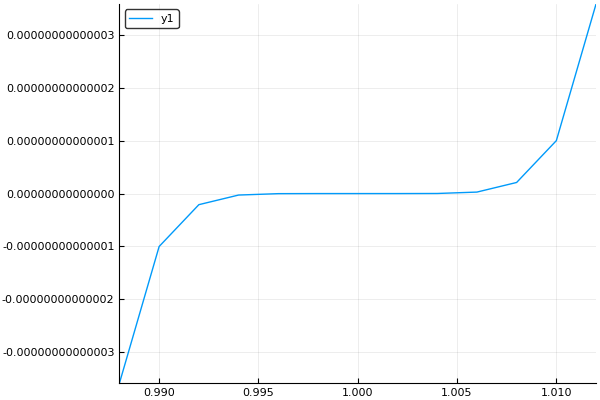

In [109]:
# Plot the polynomial #1
y1 = (x - 1).^7;
using Plots
plot(x, y1)

* The shape of two plots are similar but the first plot is not smooth as second one, since there are more polynomial terms in first equation. 

## Q5

Let the $n \times n$ matrix `H` have elements `H[i, j] = 1 / (i + j - 1)`.  
0. Write a function `h(n)` that outputs $n \times n$ matrix `H`. Try at least 3 ways, e.g., looping, [comprehension](https://docs.julialang.org/en/stable/manual/arrays/#Comprehensions-1), and vectorization. Compute and print `H` for `n = 5`.   
0. Compare their efficiencies at `n = 1000`.
0. Try different rounding modes (use function `setrounding(Float64, RoundingMode)`) and report the entry `inv(H)[1, 1]` for `n = 15`.

In [110]:
# Looping: Write a loop to creat a function of the matrix H.
function h1(n)
    H1 = rand(n, n)
    for j in 1:n, i in 1:n
        H1[i, j] = 1 / (i + j - 1)
    end
    H1
end
# Let n = 5, creat a matrix
H1 = h1(5)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [111]:
function h2(n)
    H2 = [1 / (i + j - 1) for i in 1:n, j in 1:n]
end
H2 = h2(5)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [112]:
function h3(n)
    H3 = 1 ./ (repmat((1:n)', n, 1) + repmat((1:n), 1, n) - 1)
end
H3 = h3(5)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [119]:
#efficiency of h1 (Looping)
using BenchmarkTools
@benchmark h1(1000)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     5.440 ms (0.00% GC)
  median time:      7.699 ms (0.00% GC)
  mean time:        9.543 ms (22.88% GC)
  maximum time:     55.108 ms (84.32% GC)
  --------------
  samples:          523
  evals/sample:     1

In [114]:
#efficiency of h2 (comprehension)
using BenchmarkTools
@benchmark h2(1000)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     7.813 ms (0.00% GC)
  median time:      12.533 ms (0.00% GC)
  mean time:        13.865 ms (16.64% GC)
  maximum time:     66.282 ms (9.55% GC)
  --------------
  samples:          360
  evals/sample:     1

In [115]:
#efficiency of h3 (vectorization)
using BenchmarkTools
@benchmark h3(1000)

BenchmarkTools.Trial: 
  memory estimate:  38.33 MiB
  allocs estimate:  6010
  --------------
  minimum time:     20.079 ms (0.00% GC)
  median time:      32.441 ms (30.26% GC)
  mean time:        35.808 ms (34.80% GC)
  maximum time:     220.821 ms (90.25% GC)
  --------------
  samples:          140
  evals/sample:     1

* After comparing the efficiencies, the h3 (vectorization) is relatively slow, which means looping (h1) and comprehension (h2) are more efficient.

In [116]:
setrounding(Float64, RoundNearest)
H = h1(15)
inv(H)[1,1]

158.1023247167468

In [117]:
setrounding(Float64, RoundUp)
H = h1(15)
inv(H)[1,1]

151.34155625849962

In [118]:
setrounding(Float64, RoundDown)
H = h1(15)
inv(H)[1,1]

153.81321351975203

* Based on the result, different round modes (RoundNearest, RoundUp, RoundDown) may have different result.

## Q6

0. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

0. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

0. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

0. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

### 1: Show the Sherman-Morrison Formula
To show 
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$ 
just need to show that $$( \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1} )* (\mathbf{A} + \mathbf{u} \mathbf{u}^T) = \mathbf{I}$$ 
Proof: 
$$( \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1} )* (\mathbf{A} + \mathbf{u} \mathbf{u}^T) = \mathbf{I} + \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T - \frac{\mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T + \mathbf{A}^{-1} \mathbf{u} (\mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}) \mathbf{u}^T}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}}$$
$$ = \mathbf{I} + \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T - \frac{\mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T + (\mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}) \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T} {1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}}$$
$$ =\mathbf{I} + \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T - \frac{1 + (\mathbf{u}^T \mathbf{A}^{-1} \mathbf{u})}{1 + (\mathbf{u}^T \mathbf{A}^{-1} \mathbf{u})}*\mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T $$
$$ = \mathbf{I}$$
Hence the proof.

### 2: Show the Woodbury formula
Same idea as part 1, just need to show that: 
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T) * [\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}] 
    = \mathbf{A} \mathbf{A}^{-1} + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} - \frac{\mathbf{A} \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1}} {1 + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} }
$$
$$ 
= \mathbf{I} + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} - \frac{\mathbf{U}(1 + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}) \mathbf{V}^T \mathbf{A}^{-1}}{1 + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} }
$$
$$
= \mathbf{I} + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1}
$$
$$
= \mathbf{I}
$$
Hence the proof. 

### 3: Show the binomial inversion formula
Same idea as part 1 and part 2, need to show that:
$$
(\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1})* (\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T) = \mathbf{I}
$$
$$
(\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1})* (\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)
$$
$$
= \mathbf{I} + \mathbf{I} \mathbf{U}(\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^T + \mathbf{U} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{U}^T \mathbf{A}^{-1}
$$
$$
= \mathbf{I} + \mathbf{U} \mathbf{C} \mathbf{V} \mathbf{A}^{-1} - (\mathbf{U} + \mathbf{U} \mathbf{B} \mathbf{V} \mathbf{A}^{-1} \mathbf{U}) (\mathbf{B}^{-1} + \mathbf{V} \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V} \mathbf{A}^{-1}
$$
$$
= \mathbf{I} + \mathbf{U} \mathbf{B} \mathbf{V} \mathbf{A}^{-1} - \mathbf{U} \mathbf{B} (\mathbf{B}^{-1} + \mathbf{V} \mathbf{A}^{-1} \mathbf{U}) (\mathbf{B}^{-1} + \mathbf{V} \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V} \mathbf{A}^{-1}
$$
$$
= \mathbf{I} + \mathbf{U} \mathbf{B} \mathbf{V} \mathbf{A}^{-1} - \mathbf{U} \mathbf{B} \mathbf{V} \mathbf{A}^{-1}
$$
$$
= \mathbf{I}
$$

### 4: Show the identity det(A+UVT)=det(A)det(Im+VTA−1U)
Assume $\mathbf{A} \in \mathbb{R}^{m \times m}$,

First, 
$$
\text{det}(\mathbf{A} \mathbf{B}) = \text{det}(\mathbf{A})\text{det}(\mathbf{B})
$$
we have
$$
\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) * \text{det}(\mathbf{I_m} + \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T)
$$
$$
\begin{align}
det\left(\mathbf{A}+\mathbf{UV}\mathrm{T}\right)= det
 \begin{pmatrix}
  \mathbf{I_m} & \mathbf{V}^\mathrm{T} \\
  -\mathbf{A}^{-1}\mathbf{U} & \mathbf{I_m}
 \end{pmatrix}
 \end{align}
$$

Therefore $$\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})$$


Hence the proof.